In [6]:
import numpy as np
import audio_functions as auf
import plot
from scipy import signal

# Estimación de dirección de arribo de fuentes sonoras

El objetivo del trabajo es diseñar un sistema de estimación de dirección de arribo de funetes sonoras a través de arrays de micrófonos.

## Situación inicial:

Nos encontramos en campo libre y a una distancia de la fuente de manera que la longitud de onda se considera plana. El sistema consiste en 2 micrófonos de medición de campo libre, esto es respuesta plana en frecuencia y patrón polar omnidireccional, separados por una distancia $d$ de 10 cm. La estimación de dirección se calculará a partir de la diferencia de tiempo de arrivo entre los micrófonos, en donde la diferencia de tiempo de arrivo será obtenida a través de la correlación cruzada entre la señal de ambos micrófonos:

$$
R_{xy}[k] = \sum_{n=0}^{N-1} x[n] \cdot y[n + k]
$$

$$
\tau_{1,2} = \frac{d\cdot cos(\theta)}{c}
$$

$$
\theta = arcos(\frac{c\cdot \tau_{1,2}}{d})
$$


# Respuesta al impulso del sistema

Se calcula la respuesta al impulso del sistema encargado de obtener el TDOA, es decir, la correlación entre señales.

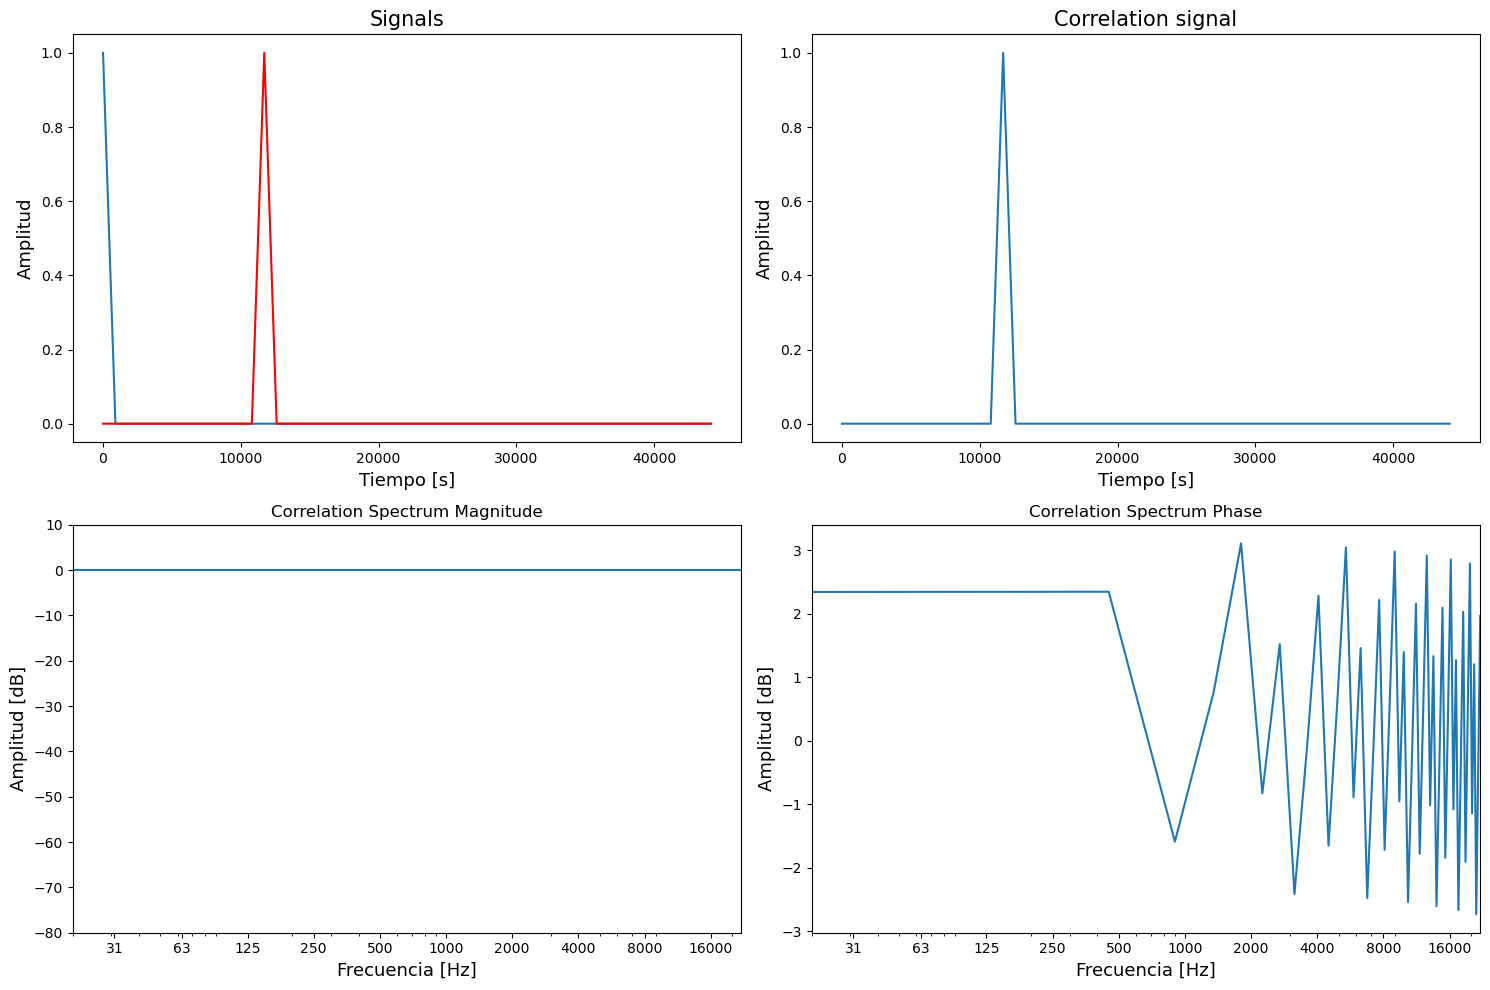

In [10]:
fs = 44100
time_delay = 30e-5
n = np.linspace(0, fs)

x1 = np.zeros_like(n)
x1[0] = 1
x2 = np.roll(x1, int(time_delay*fs))

corr = signal.correlate(x2, x1, mode='full')

signals_pd = lambda: plot.plot_signal({"time vector": n, "signal":x1, "label":"Pulse"}, {"time vector": n, "signal":x2, "label":"Delayed pulse", "color":"red"}, title="Signals", show=False)
corr_pd = lambda: plot.plot_signal({"time vector": n, "signal":x2}, title="Correlation signal", show=False)
corr_fft_mag = lambda: plot.plot_fft_mag({"audio signal": corr}, title="Correlation Spectrum Magnitude", show=False)
corr_fft_phase = lambda: plot.plot_fft_phase({"audio signal": corr}, title="Correlation Spectrum Phase", show=False)

plot.multiplot(signals_pd, corr_pd, corr_fft_mag, corr_fft_phase, figsize=(15, 10))